In [11]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5
print("Seperation:",sep)

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generate_data(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        
        
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1) 
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y ])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

Seperation: -5


In [12]:
import matplotlib.pyplot as plt
top,bottom = generate_data(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [14]:
def graph_plot(weight, df):
    slope = -(weight[1]/weight[2])  
    intercept = -weight[0]/weight[2]

    #Plot data on graph
    xstart = min(df.iloc[:,1])
    xend = max(df.iloc[:,1])
    colors = {-1:'red', 1:'green'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    line = np.linspace(xstart, xend, 1000)
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key]) 
    plt.plot()
    plt.plot(line, slope*line +intercept, '-b') 


In [15]:
def plot_err_ite(err,iterations):
    x = []
    y = err
    for i in range(iterations):
        x.append(i)
    
    plt.title("Ein V/S Iteration")
    plt.plot(x, y, '-b') 
    plt.show()


Initial Weight: [0. 0. 0.]
Weight: [-28.           0.3842312   42.89693743] Min_in_Sample_Error: 0.132
Weight: [-38.         -23.24249049  46.25441491] Min_in_Sample_Error: 0.121
Weight: [-40.         -22.33238123  46.27053159] Min_in_Sample_Error: 0.118
Weight: [-41.         -22.63050554  46.6809517 ] Min_in_Sample_Error: 0.1095
Weight: [-49.         -22.44994309  44.98261826] Min_in_Sample_Error: 0.1075
Weight: [-46.           1.55717039  45.31165686] Min_in_Sample_Error: 0.1045
Total time:  281.0052659511566
Count: 100000
Final Weight: [-46.           1.55717039  45.31165686]


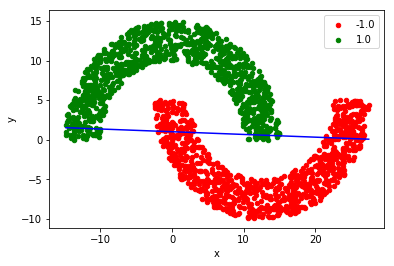

In [34]:
import time
from pandas import DataFrame

#Pocket Algorithm
def pocket_algo(x,y):
    start_time = time.time()
    flag = False
    count =0
    ite = 100000
    w = np.zeros(len(x[0]))
    in_sample_err = []
    min_e_in = 1
    n =  len(x)
    w_vector = np.zeros(len(x[0]))
    print("Initial Weight:",w)
    
    for i in range(ite): 
        e_in_count = 0 
        for i in range(n):
            if(np.dot(x[i],w)*y[i] <=0):
                e_in_count = e_in_count + 1
                w[0]= w[0] + x[i,0]*y[i]
                w[1]= w[1] + x[i,1]*y[i]
                w[2]= w[2] + x[i,2]*y[i]
                
                
        ein_error = e_in_count/n 
        in_sample_err.append(ein_error)

        if(ein_error < min_e_in):
            w_vector[0] = w[0]
            w_vector[1] = w[1]
            w_vector[2] = w[2]
            
            min_e_in = ein_error
            print("Weight:", w_vector, "Min_in_Sample_Error:", min_e_in)
            

    end_time = time.time()    
    
    total_time = end_time - start_time
    print("Total time: ",total_time)
    print("Count:", ite)
    print("Final Weight:", w_vector)
    
    return w_vector, in_sample_err, ite


#Function call
weight, in_sam_err_list, iterations = pocket_algo(data[:,0:3],data[:,3])
d_frame = DataFrame(dict(bias=data[:,0], x=data[:,1], y=data[:,2], label=data[:,3]))

#Plotting
graph_plot(weight,d_frame)



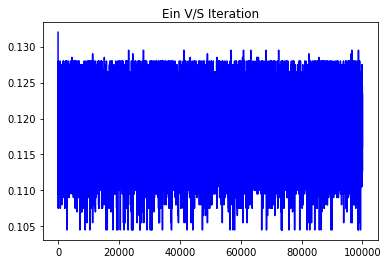

In [35]:
plot_err_ite(in_sam_err_list, iterations)

Total time:  0.002835988998413086
Weight: [-0.11441022 -0.02244139  0.10160246]


Text(0.5,1,'Linear Regression')

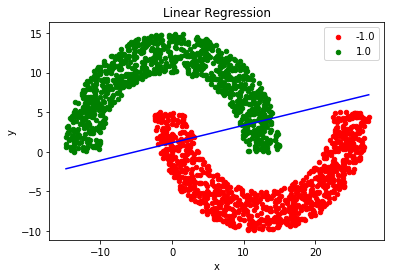

In [18]:
def linear_regression(x,y):
    start = time.time()
    pseudo_X = np.linalg.inv((np.matmul(np.transpose(x),x)))
    x_t = np.matmul(pseudo_X, np.transpose(x))
    w = np.matmul(x_t,y)
    end = time.time()
    
   
    print("Total time: ",end - start)
    print("Weight:", w)
    return w


weight = linear_regression(data[:,0:3],data[:,3])
df = DataFrame(dict(bias=data[:,0], x=data[:,1], y=data[:,2], label=data[:,3]))

graph_plot(weight,df)
plt.title("Linear Regression")

In [19]:
#Non-Linear transformation...3rd Order

data_transformed = []
for i in range(len(data)):

    x1 = data[i,1]
    x2 = data[i,2]
    x1_2 = x1**2
    x2_2 = x2**2
    x1_x2 = x1*x2
    x1_2_x2 = x1_2 * x2
    x2_2_x1 = x2_2 * x1
    x1_3 = x1**3
    x2_3 = x2**3
    y = data[i,3]
    
    temp = [1,x1, x2 ,x1_2, x1_x2, x2_2, x1_3, x1_2_x2, x2_2_x1, x2_3,y]
    data_transformed.append(temp) 
    
data_transformed = np.array(data_transformed)
print("Linear Data:", data[1])
print("3rd Order Data:",data_transformed[1])


Linear Data: [ 1.         19.40846839 -6.59528842 -1.        ]
3rd Order Data: [ 1.00000000e+00  1.94084684e+01 -6.59528842e+00  3.76688645e+02
 -1.28004447e+02  4.34978293e+01  7.31094967e+03 -2.48437026e+03
  8.44226245e+02 -2.86880730e+02 -1.00000000e+00]


In [20]:
def pocket_nonlinear(x,y):
   
    starttime = time.time()
    w = np.zeros(len(x[0]))
    flag = False
    t = 100000
    in_sam_err = []
    min_e_in = 1
    n =  len(x)
    w_vector = np.zeros(len(x[0]))
    print("Initial Weight:",w)
    for i in range(t): 
        e_in = 0 
        for i in range(n):
            if(np.dot(x[i],w)*y[i] <=0):
                e_in = e_in + 1
                w[0]= w[0] + x[i,0]*y[i]
                w[1]= w[1] + x[i,1]*y[i]
                w[2]= w[2] + x[i,2]*y[i]
                w[3]= w[3] + x[i,3]*y[i]
                w[4]= w[4] + x[i,4]*y[i]
                w[5]= w[5] + x[i,5]*y[i]
                w[6]= w[6] + x[i,6]*y[i]
                w[7]= w[7] + x[i,7]*y[i]
                w[8]= w[8] + x[i,8]*y[i]
                w[9]= w[9] + x[i,9]*y[i]
                
                
        in_sample_error = e_in/n 
        in_sam_err.append(in_sample_error)
        
        if(in_sample_error < min_e_in):
            w_vector[0] = w[0]
            w_vector[1] = w[1]
            w_vector[2] = w[2]
            w_vector[3] = w[3]
            w_vector[4] = w[4]
            w_vector[5] = w[5]
            w_vector[6] = w[6]
            w_vector[7] = w[7]
            w_vector[8] = w[8]
            w_vector[9] = w[9]
           
            min_e_in = in_sample_error
            
    endtime = time.time()    
 
    print("Total time: ",endtime - starttime)
    print("Count:", t)
    print("Final Weight: ",w_vector)
   
    return w_vector, in_sam_err, t

In [21]:
def plot_nonlinear(weights, df):
    slope = -(weights[1]/weights[2])  
    intercept = -weights[0]/weights[2]

    #Plot data on graph
    xstart = min(df.iloc[:,1])
    xend = max(df.iloc[:,1])
    colors = {-1:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    line = np.linspace(xstart, xend, 1000)
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key]) 
    plt.plot()
    plt.plot(line, slope*line +intercept, '-g') 


In [31]:
#pocket algorithm for 100,000 iterations 

weights,in_sam_err_list, iterations = pocket_nonlinear(data_transformed[:,0:10],data_transformed[:,10])
df = DataFrame(dict(bias=data_transformed[:,0], x=data_transformed[:,1], y=data_transformed[:,2], label=data_transformed[:,3]))


Initial Weight: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Total time:  253.43953609466553
Count: 100000
Final Weight:  [-778421.         -231176.81829653  -99710.76509179  140157.6784502
  268111.15281872 -410769.69215079   -6426.20110346   -9535.10544315
    -909.1885344    84367.14336404]


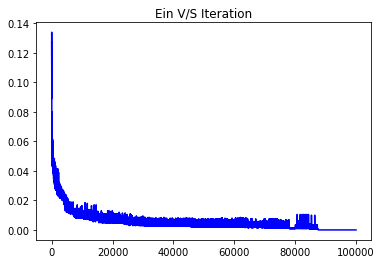

In [32]:
#Plot Ein v/s Iterations t.
plot_err_ite(in_sam_err_list,iterations)

In [33]:
#Linear Regression
weights = linear_regression(data_transformed[:,0:9],data_transformed[:,9])

Total time:  0.0018241405487060547
Weight: [-1.52381332e+02 -1.31538006e+01  1.66529868e+01  1.39902321e+00
  9.17272288e+00  1.24720043e+01 -1.71707231e-02 -4.19485795e-01
 -7.87697523e-01]
